In [1]:
import sys
sys.path.append("/mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
#from pyACC.helpers import Logger

# Set the logger
#print = Logger("pyACC.CosmologicalDistances")

# Import your integration methods
from pyACC.Calculus import *
from pyACC.Calculus.interpolation import *

# Import integration class
from pyACC.cosmology import *

import scipy as sp
from scipy import interpolate

# Import pandas
import pandas as pd

from random import randint

In [2]:
# definition of parameters
n_steps = 3
n_in = 1
n_fin = 3
z_min = 0.0001
z_max = 1.0
z_steps = 150

In [3]:
# array of number of point for the interpolation
N_int = np.logspace(n_in,n_fin,n_steps)

# array in which the function will be evaluated
z_th = np.linspace(z_min, z_max, z_steps)

# theoretical results
comoving_distance_th = comoving_distance(z_th)

In [4]:
# function to interpolate
f = Interpolation(lambda z: comoving_distance(z))

In [5]:
# interpolation results
list_cd = f.interpol(n_steps,n_in,n_fin,z_min,z_max,z_steps)

In [6]:
# calculation of theoretical error
list_error_th = f.theoretical_error(n_steps,n_in,n_fin,z_min,z_max,z_steps)

In [7]:
# difference between theoretical and interpolated function
list_comparison = f.theoretical_comparison(n_steps,n_in,n_fin,z_min,z_max,z_steps)

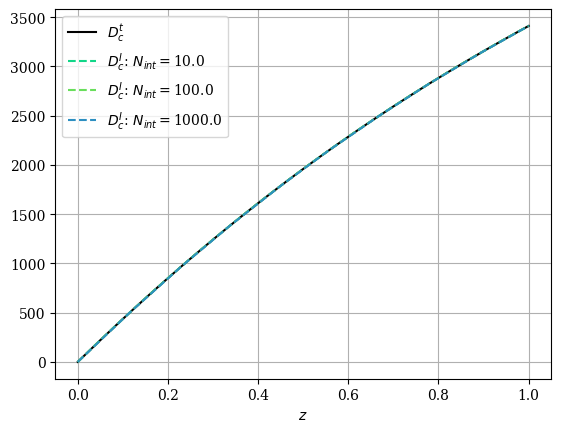

In [8]:
# plot of the interpolated function and the theoretical one:
colors = []
for i in range(n_steps):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

plt.plot(z_th, comoving_distance_th, label=r'$D_c^t$', color='black')
for i in range(N_int.size):
    plt.plot(z_th, list_cd[i], label=r'$D_c^I$:' + r'$ \ N_{int}=$' + str(N_int[i]), linestyle='dashed', color=colors[i])


plt.grid(True)
plt.xlabel(r'$z$');
plt.legend()

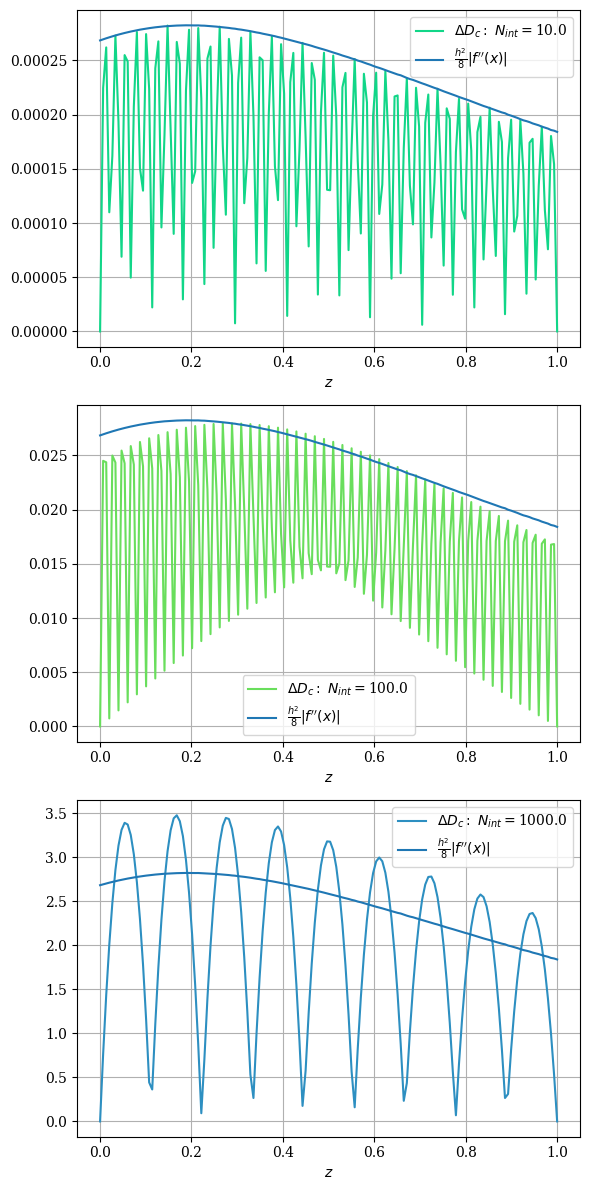

In [9]:
# plot of the comparison of the two mwthods and the theoretical error

fig, ax = plt.subplots(N_int.size, 1, figsize=(6, 4*N_int.size))

for i in range(N_int.size):
    ax[i].plot(z_th, list_comparison[i], label=r'$\Delta D_c :$' + r'$ \ N_{int}=$' + str(N_int[i]), color=colors[i])
    ax[i].plot(z_th, list_error_th[i], label=r'$\frac{h^2}{8}|f^{\prime \prime}(x)|$')

for _ax in ax.flatten():
    _ax.grid(True)
    _ax.set_xlabel(r'$z$')
    _ax.legend()
fig.tight_layout()